In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [43]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

In [19]:
batch_size = 32
img_height = 250
img_width = 250

In [20]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\gouth\\Downloads\\New folder\\accedent\\data\\train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\gouth\\Downloads\\New folder\\accedent\\data\\test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\gouth\\Downloads\\New folder\\accedent\\data\\val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [21]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
from keras.applications.vgg16 import VGG16

In [23]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.VGG16(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

In [24]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
25/25 [==============================] - 29s 723ms/step - loss: 1.5164 - accuracy: 0.6776 - val_loss: 0.3191 - val_accuracy: 0.8776
Epoch 2/50
25/25 [==============================] - 8s 339ms/step - loss: 0.2189 - accuracy: 0.9102 - val_loss: 0.1782 - val_accuracy: 0.9184
Epoch 3/50
25/25 [==============================] - 8s 339ms/step - loss: 0.0912 - accuracy: 0.9709 - val_loss: 0.1444 - val_accuracy: 0.8980
Epoch 4/50
25/25 [==============================] - 8s 339ms/step - loss: 0.0704 - accuracy: 0.9760 - val_loss: 0.1094 - val_accuracy: 0.9490
Epoch 5/50
25/25 [==============================] - 9s 342ms/step - loss: 0.0721 - accuracy: 0.9722 - val_loss: 0.1801 - val_accuracy: 0.9388
Epoch 6/50
25/25 [==============================] - 8s 341ms/step - loss: 0.0546 - accuracy: 0.9785 - val_loss: 0.1545 - val_accuracy: 0.9388
Epoch 7/50
25/25 [==============================] - 9s 342ms/step - loss: 0.0680 - accuracy: 0.9747 - val_loss: 0.2046 - val_accuracy: 0.9286
Epoch

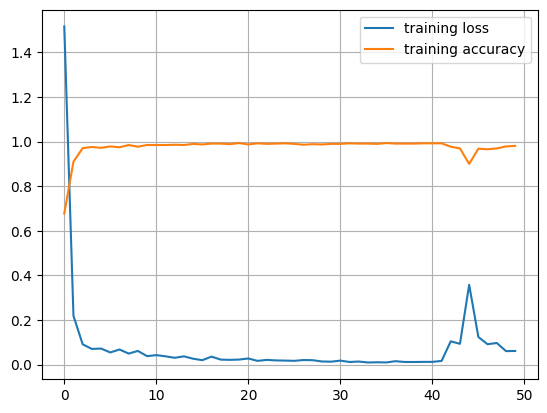

In [27]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

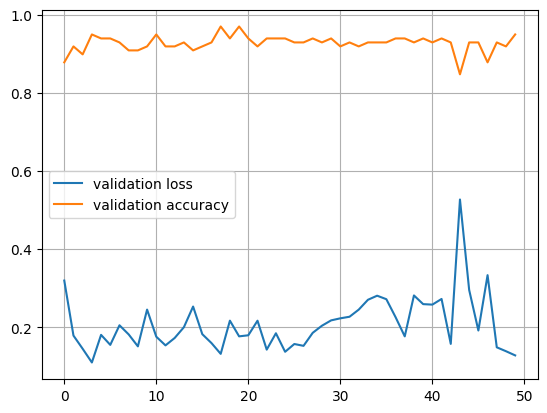

In [28]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

1/1 [==============================] - 0s 31ms/step


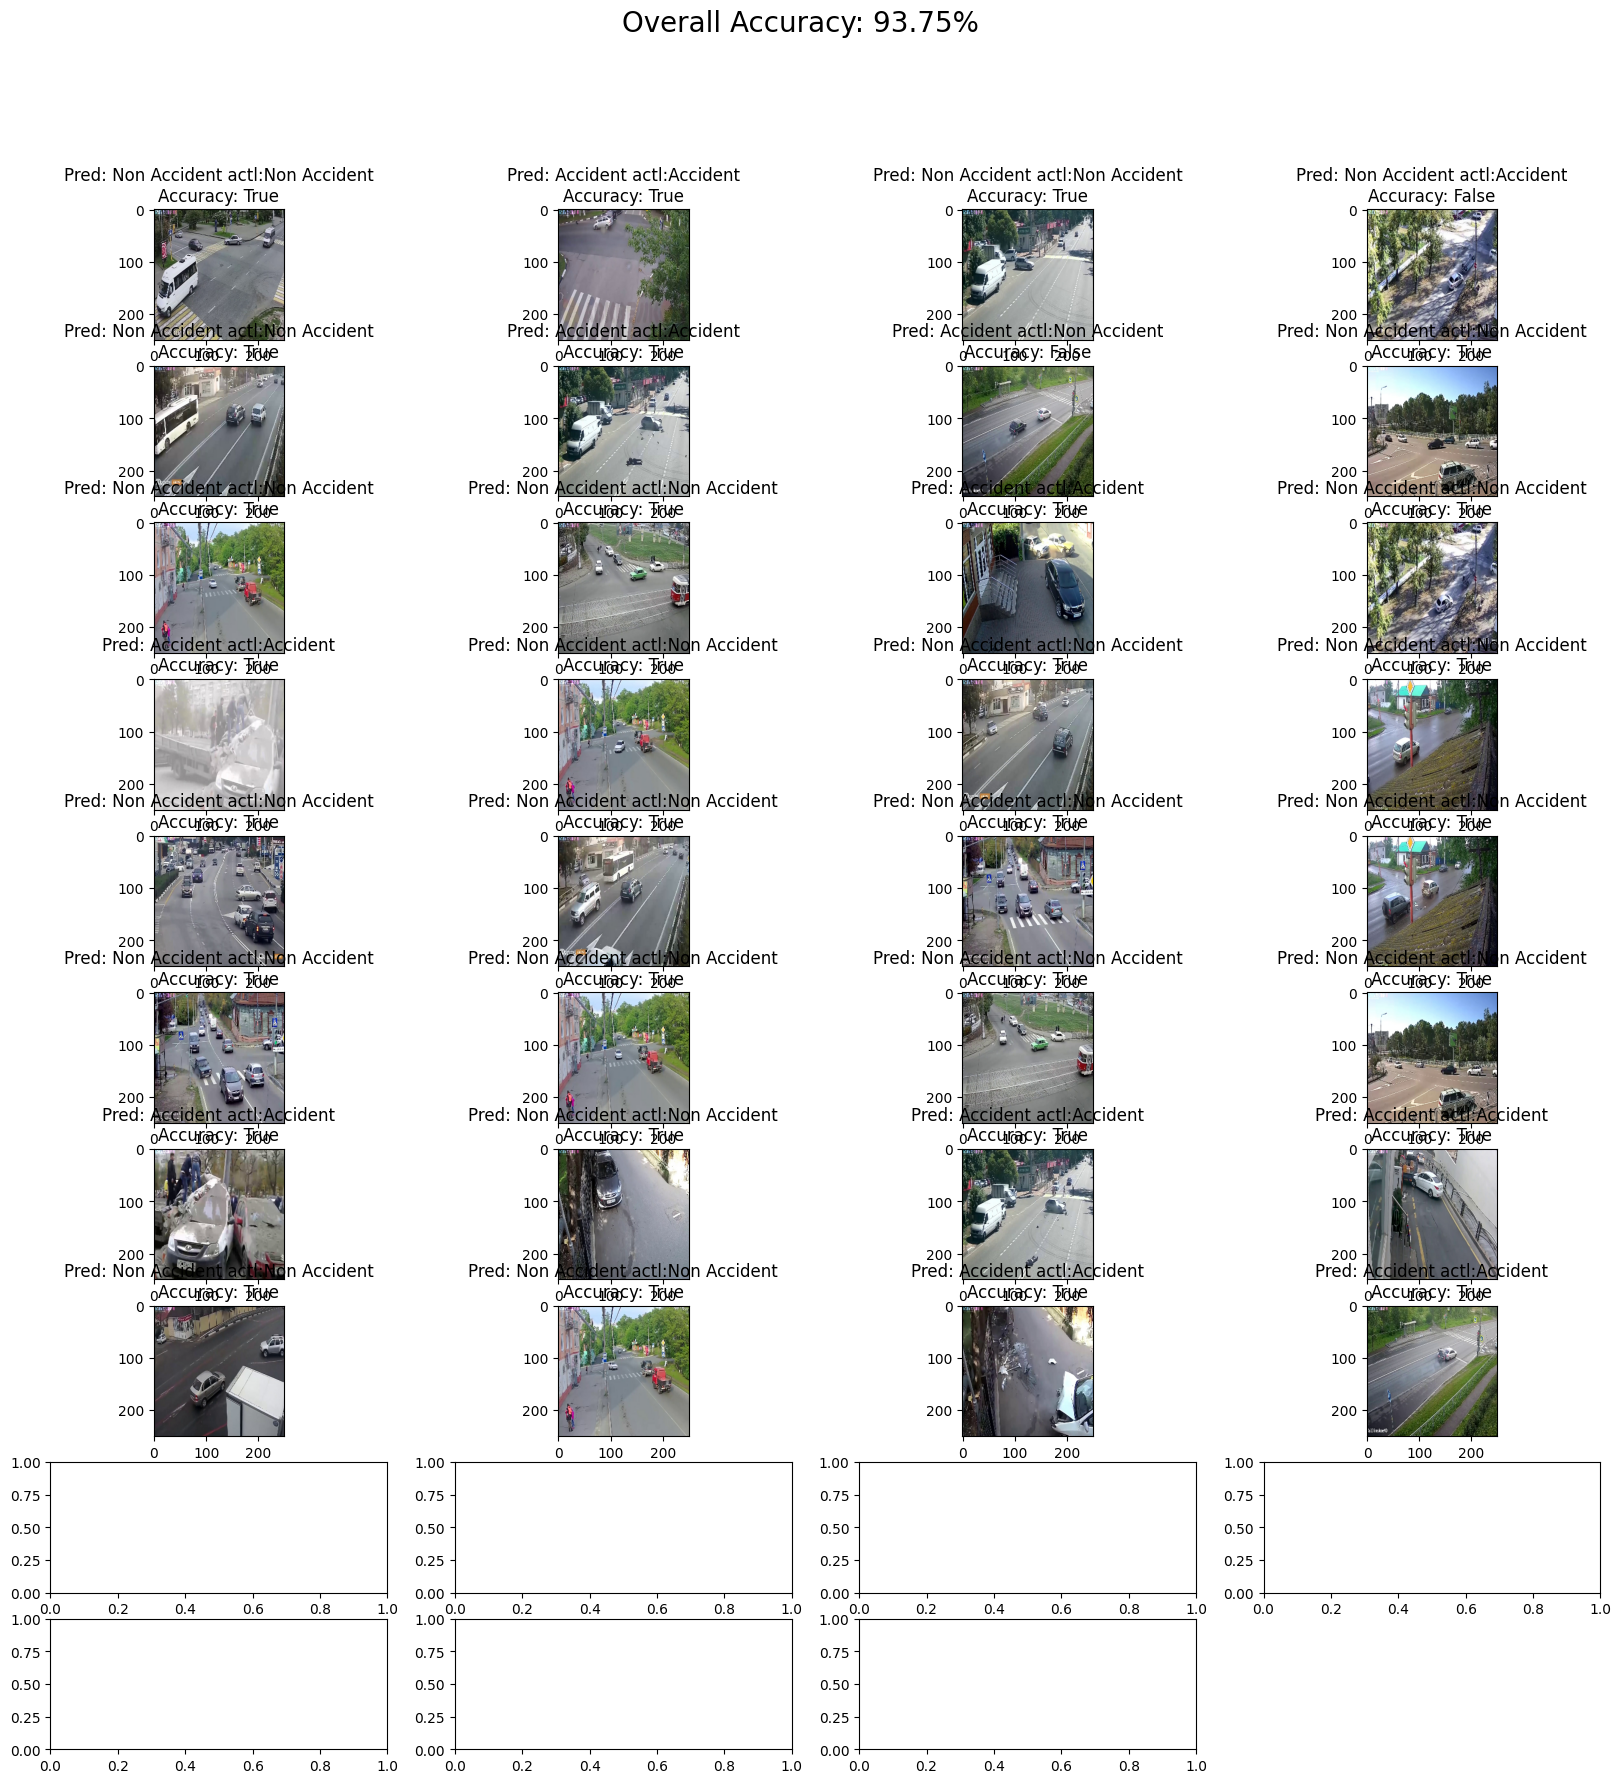

In [36]:
AccuracyVector = []

plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    
    # Calculate accuracy
    accuracy = np.mean(AccuracyVector)
    
    for i in range(40):
        for i in range(40):  # Ensure range does not exceed number of images
            ax = plt.subplot(10, 4, i + 1)
            if i < len(images):
                plt.imshow(images[i].numpy().astype("uint8"))
                plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] + f'\nAccuracy: {AccuracyVector[i]}')
        
        plt.axis('off')
        plt.grid(True)

# Display overall accuracy
plt.suptitle(f'Overall Accuracy: {accuracy:.2%}', fontsize=20)
plt.show()

In [39]:
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

# Assuming labels, class_names, and predlabel are lists or numpy arrays with the same length
num_samples = min(len(labels), len(predlabel))

for i in range(num_samples):
    if (predlabel[i] == class_names[labels[i]] and predlabel[i] == 'Accident'):
        truePositive += 1
    elif (predlabel[i] == class_names[labels[i]] and predlabel[i] == 'Non Accident'):
        trueNegative += 1
    elif (predlabel[i] == 'Non Accident' and class_names[labels[i]] == 'Accident'):
        falseNegative += 1
    else:
        falsePositive += 1

# Now truePositive, trueNegative, falsePositive, falseNegative hold the correct values


In [40]:
print(f'True positives are: {truePositive}')
print(f'True negatives are: {trueNegative}')
print(f'False negatives are: {falseNegative}')
print(f'False positives are: {falsePositive}')

True positives are: 9
True negatives are: 21
False negatives are: 1
False positives are: 1


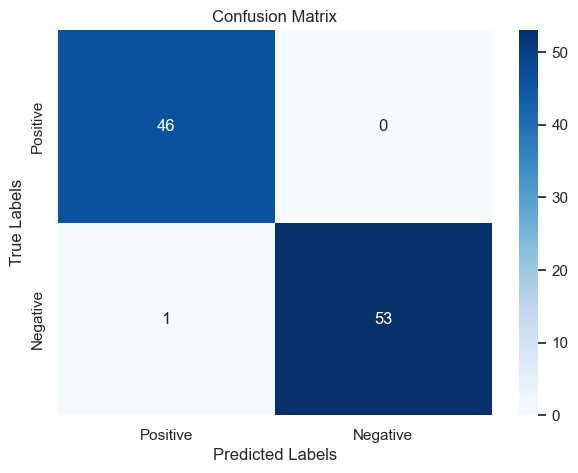

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_positives = 46
true_negatives = 53
false_negatives = 1
false_positives = 0

confusion_mat = confusion_matrix([1, 0, 1, 0], [1, 0, 0, 1],
                                  labels=[1, 0],
                                  sample_weight=[true_positives, true_negatives, false_positives, false_negatives])

labels = ['Positive', 'Negative']

sns.set()
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
print(class_names)

['Accident', 'Non Accident']


In [50]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [ ]:
import cv2
image=[]
label=[]

c=1
cap= cv2.VideoCapture("C:\\Users\\gouth\\Downloads\\Video\\videoplayback.mp4")
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

In [53]:
import cv2
import tensorflow as tf
image = []
label = []
c = 1
cap = cv2.VideoCapture("C:\\Users\\gouth\\Downloads\\Video\\videoplayback.mp4")

if not cap.isOpened():
    print("Error: Unable to open video file.")
else:
    while True:
        grabbed, frame = cap.read()
        if not grabbed:
            break  # Break the loop if there are no more frames to read
        
        if c % 30 == 0:
            print(c)
            resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
            image.append(resized_frame)
            label.append(predict_frame(resized_frame))
            
            if len(image) == 75:
                break
        c += 1

cap.release()


30
1/1 [==============================] - 0s 27ms/step
60
1/1 [==============================] - 0s 30ms/step
90
1/1 [==============================] - 0s 25ms/step
120
1/1 [==============================] - 0s 24ms/step
150
1/1 [==============================] - 0s 29ms/step
180
1/1 [==============================] - 0s 27ms/step
210
1/1 [==============================] - 0s 25ms/step
240
1/1 [==============================] - 0s 22ms/step
270
1/1 [==============================] - 0s 22ms/step
300
1/1 [==============================] - 0s 21ms/step
330
1/1 [==============================] - 0s 27ms/step
360
1/1 [==============================] - 0s 24ms/step
390
1/1 [==============================] - 0s 24ms/step
420
1/1 [==============================] - 0s 23ms/step
450
1/1 [==============================] - 0s 27ms/step
480
1/1 [==============================] - 0s 28ms/step


In [55]:
# Display the 20th image and its label
plt.figure(figsize=(4, 4))
plt.imshow(image[20].astype("uint8"))  # Convert to uint8 for correct display
plt.title(f"Label: {label[20]}")
plt.axis("off")  # Hide the axis
plt.show()

IndexError: list index out of range

<Figure size 400x400 with 0 Axes>

30
1/1 [==============================] - 0s 26ms/step
60
1/1 [==============================] - 0s 25ms/step
90
1/1 [==============================] - 0s 27ms/step
120
1/1 [==============================] - 0s 23ms/step
150
1/1 [==============================] - 0s 29ms/step
180
1/1 [==============================] - 0s 28ms/step
210
1/1 [==============================] - 0s 29ms/step
240
1/1 [==============================] - 0s 28ms/step
270
1/1 [==============================] - 0s 33ms/step
300
1/1 [==============================] - 0s 26ms/step
330
1/1 [==============================] - 0s 37ms/step
360
1/1 [==============================] - 0s 37ms/step
390
1/1 [==============================] - 0s 25ms/step
420
1/1 [==============================] - 0s 23ms/step
450
1/1 [==============================] - 0s 24ms/step
480
1/1 [==============================] - 0s 24ms/step
510
1/1 [==============================] - 0s 24ms/step
540
1/1 [==============================] - 0s 21ms/

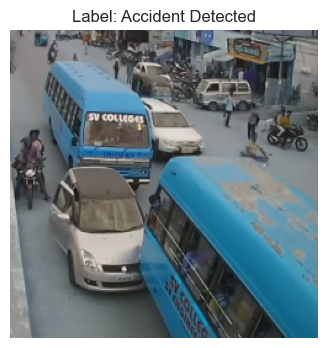

In [57]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

image = []
label = []
c = 1
cap = cv2.VideoCapture("C:\\Users\\gouth\\Downloads\\Video\\videoplayback_2.mp4")

# Initialize image and label lists with a fixed size
max_images = 75

if not cap.isOpened():
    print("Error: Unable to open video file.")
else:
    while True:
        grabbed, frame = cap.read()
        if not grabbed:
            break  # Break the loop if there are no more frames to read
        
        if c % 30 == 0:
            print(c)
            resized_frame = tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
            image.append(resized_frame)
            label.append(predict_frame(resized_frame))
            
            if len(image) == max_images:
                break
        c += 1

cap.release()

# Display the 20th image and its label
if len(image) > 20:
    plt.figure(figsize=(4, 4))
    plt.imshow(image[20].astype("uint8"))  # Convert to uint8 for correct display
    plt.title(f"Label: {label[20]}")
    plt.axis("off")  # Hide the axis
    plt.show()
else:
    print("There are not enough images to display the 20th one.")


In [25]:
model.save('"C:\Users\gouth\OneDrive\Desktop\Accedent"accedent.h5')